best bandwidth: 3.79269019073225


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IP

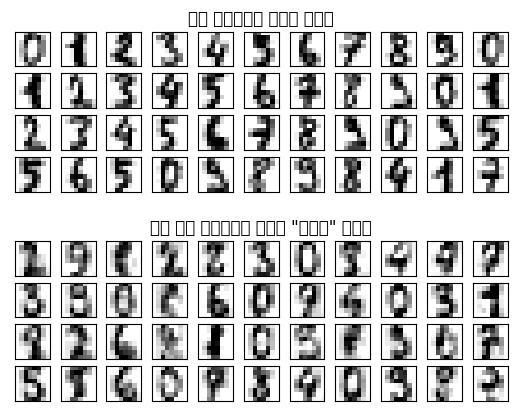

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# 손글씨 숫자 데이터 로드
digits = load_digits()

# 64차원 데이터를 더 낮은 차원으로 차원 축소
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# 그리드 검색 교차 검증을 사용하여 최적의 대역폭 찾기
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

# 최적의 대역폭 출력
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# 최적의 추정기로 커널 밀도 추정치 계산
kde = grid.best_estimator_

# 데이터에서 새로운 44개의 점 샘플링
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# 데이터를 4x11 그리드로 변환
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# 실제 숫자와 재샘플링된 숫자를 플로팅
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)  # 중간에 빈 줄을 만듦
    for i in range(4):
        # 입력 데이터에서 선택된 실제 숫자 이미지 표시
        im = ax[i, j].imshow(
            real_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)
        # 커널 밀도 모델에서 그려진 "새로운" 숫자 이미지 표시
        im = ax[i + 5, j].imshow(
            new_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)

# 제목 설정
ax[0, 5].set_title("입력 데이터에서 선택된 이미지")
ax[5, 5].set_title('커널 밀도 모델로부터 그려진 "새로운" 숫자들')

plt.show()
